Tensorflow에서 Pretrained 된 Inference모델(Frozen graph)와 환경파일을 다운로드

In [ ]:
!mkdir ./pretrained

!wget http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar xvf mask_rcnn_inception_v2_coco_2018_01_28.tar.gz -C ./pretrained

!wget -O ./pretrained/mask_rcnn_config.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt

--2022-06-20 21:13:00--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.189.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: ‘mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’

mask_rcnn_inception 100%[===================>] 169.58M  72.1MB/s    in 2.4s    

2022-06-20 21:13:03 (72.1 MB/s) - ‘mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [177817887/177817887]

mask_rcnn_inception_v2_coco_2018_01_28/
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
mask_rcnn_inception_v2_coco_2018_01_28/checkpoint
mask_rcnn_inception_v2_coco_2018_01_28/pipeline.config
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
mask_

In [ ]:
import cv2

config_file="/content/pretrained/mask_rcnn_config.pbtxt"
pretrained_model_file="/content/pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb"

# pretrained_model_file부터 입력
cv_net=cv2.dnn.readNetFromTensorflow(pretrained_model_file,config_file)

In [ ]:
!mkdir ./data
!wget -O ./data/street.png https://raw.githubusercontent.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/main/MMDetection_Mask_R-CNN_Object_Detection/images/street.png

--2022-06-20 21:13:10--  https://raw.githubusercontent.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/main/MMDetection_Mask_R-CNN_Object_Detection/images/street.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730971 (714K) [image/png]
Saving to: ‘./data/street.png’

./data/street.png   100%[===================>] 713.84K  --.-KB/s    in 0.05s   

2022-06-20 21:13:11 (12.9 MB/s) - ‘./data/street.png’ saved [730971/730971]



In [ ]:
img_array=cv2.imread("/content/data/street.png")

blob=cv2.dnn.blobFromImage(img_array,swapRB=True, crop=False)
cv_net.setInput(blob)

layer_names=cv_net.getLayerNames()
layer_names

['Preprocessor/mul',
 'Preprocessor/sub',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d/depthwise',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/Relu',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/MaxPool_2a_3x3/MaxPool',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/Conv2D',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/Relu',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/Conv2D',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/Relu',
 'FirstStageFeatureExtractor/InceptionV2/I

In [ ]:
bboxes,masks=cv_net.forward(['detection_out_final','detection_masks'])

In [ ]:
print("bboxes shapeb : ",bboxes.shape,"\nmasks.shape : ",masks.shape)

bboxes shapeb :  (1, 1, 100, 7) 
masks.shape :  (100, 90, 15, 15)


In [ ]:
bboxes

array([[[[0.0000000e+00, 2.0000000e+00, 9.9552059e-01, 8.7115318e-03,
          6.7886364e-01, 2.4865286e-01, 9.4155705e-01],
         [0.0000000e+00, 2.0000000e+00, 9.7366083e-01, 5.8652627e-01,
          2.4779527e-01, 6.4882815e-01, 3.3894572e-01],
         [0.0000000e+00, 2.0000000e+00, 9.7022027e-01, 1.7230719e-01,
          5.4547870e-01, 3.6028183e-01, 7.7864492e-01],
         [0.0000000e+00, 9.0000000e+00, 9.4660443e-01, 8.7035275e-01,
          5.5581486e-01, 9.4044971e-01, 6.5948272e-01],
         [0.0000000e+00, 2.0000000e+00, 9.0777665e-01, 5.1106429e-01,
          3.0273688e-01, 5.8274913e-01, 4.2616051e-01],
         [0.0000000e+00, 2.0000000e+00, 8.9440316e-01, 2.9111919e-01,
          4.8603252e-01, 4.2013761e-01, 6.6972393e-01],
         [0.0000000e+00, 9.0000000e+00, 8.4322286e-01, 8.5336339e-01,
          1.6138782e-01, 8.9902353e-01, 4.8660600e-01],
         [0.0000000e+00, 0.0000000e+00, 7.3565656e-01, 4.4605839e-01,
          3.3239016e-01, 4.7943753e-01, 4.629079

In [ ]:
masks

array([[[[4.42479085e-03, 3.40736657e-03, 3.02660908e-03, ...,
          5.82988076e-02, 9.24072322e-03, 7.64790783e-03],
         [2.90949899e-03, 3.17149772e-03, 4.58104303e-03, ...,
          1.22715823e-01, 9.57375392e-03, 4.09907848e-03],
         [5.17408922e-03, 6.91071991e-03, 2.45466884e-02, ...,
          4.81770992e-01, 5.35275340e-02, 6.90374989e-03],
         ...,
         [3.63017648e-01, 7.06445932e-01, 5.39273202e-01, ...,
          7.53066549e-03, 9.61713551e-04, 1.36719365e-03],
         [2.91429162e-01, 6.09970033e-01, 4.51388031e-01, ...,
          1.88994792e-03, 6.06079178e-04, 1.43771223e-03],
         [7.45969489e-02, 1.32603958e-01, 1.00136489e-01, ...,
          1.57260895e-03, 6.68587920e-04, 1.61301135e-03]],

        [[2.59690592e-03, 1.08775264e-03, 1.87023531e-03, ...,
          4.68022227e-02, 6.92236051e-03, 1.08804647e-03],
         [9.53018141e-04, 1.27350364e-03, 4.23510512e-03, ...,
          2.05864176e-01, 1.06153013e-02, 7.23949401e-04],
        

Detect된 Object에 대해서 bounding box와 mask를 시각화

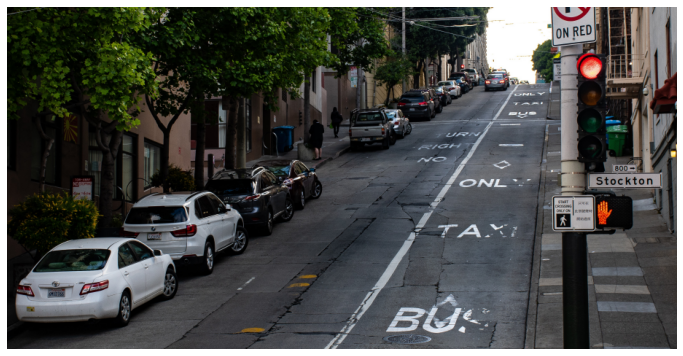

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_array=cv2.imread("/content/data/street.png")
img_array_rgb=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(img_array_rgb)

In [ ]:
labels_to_names_seq= {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

In [ ]:
import numpy as np

draw_img=img_array_rgb.copy()

img_height,img_width=draw_img.shape[:2]

conf_threshold=0.5
mask_threshold=0.3

for i in range(1):
  box=bboxes[0,0,i]
  mask=masks[i]
  score=float(box[2])
  if score>conf_threshold:
    class_id=int(box[1])
    left=int(box[3]*img_width)
    top=int(box[4]*img_height)
    right=int(box[5]*img_width)
    bottom=int(box[6]*img_height)

    caption="{} : {:.4f}".format(labels_to_names_seq[class_id],score)

    cv2.rectangle(draw_img,(left,top),(right,bottom),(0,0,255),thickness=2)
    cv2.putText(draw_img,caption,(left,top-5),cv2.FONT_HERSHEY_SIMPLEX,0.3,(0,255,0),1)

    class_mask=mask[class_id]
    print("class_id: ",class_id)
    print("Detect된 class_mask shape : ",class_mask.shape)

    class_mask_resize=cv2.resize(class_mask,(right-left+1,bottom-top+1))
    print("원본 이미지 object 비율로 resize된 mask size : ",class_mask_resize.shape)

    mask_boole=(class_mask_resize>mask_threshold)
    print("resize된 mask에서 True의 shape : ",mask_boole[mask_boole==True].shape)
    print("resize된 mask에서 False의 shape : ",mask_boole[mask_boole==False].shape)

    before_mask_roi = draw_img[top:bottom+1, left:right+1]
    print("mask를 적용할 bounding box 영역의 image 추출 :",before_mask_roi.shape)



class_id:  2
Detect된 class_mask shape :  (15, 15)
원본 이미지 object 비율로 resize된 mask size :  (124, 221)
resize된 mask에서 True의 shape :  (19763,)
resize된 mask에서 False의 shape :  (7641,)
mask를 적용할 bounding box 영역의 image 추출 : (124, 221, 3)


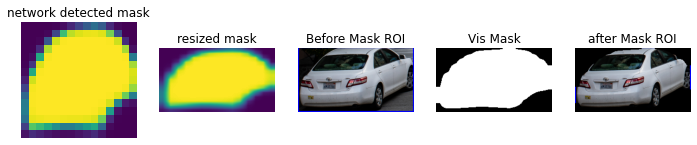

In [ ]:
vis_mask = (mask_boole * 255).astype("uint8")
instance = cv2.bitwise_and(before_mask_roi, before_mask_roi, mask=vis_mask)

fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(figsize=(12,12),ncols=5,nrows=1)

ax1.set_title("network detected mask")
ax1.axis("off")
ax1.imshow(class_mask)

ax2.set_title('resized mask')
ax2.axis('off')
ax2.imshow(class_mask_resize)


ax3.set_title('Before Mask ROI')
ax3.axis('off')
ax3.imshow(before_mask_roi)

ax4.set_title('Vis Mask')
ax4.axis('off')
ax4.imshow(vis_mask, cmap='gray')

ax5.set_title('after Mask ROI')
ax5.axis('off')
ax5.imshow(instance)

Mask 정보를 이용하여 Detect된 Object에 contour 윤곽선 적용.

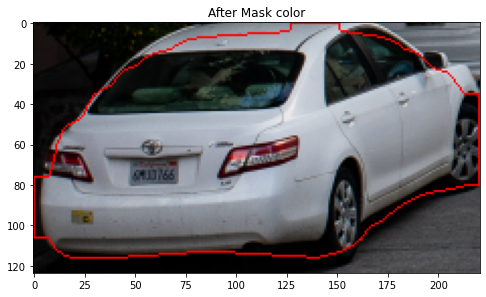

In [ ]:
draw_img=img_array_rgb.copy()

contours,hierarchy=cv2.findContours(vis_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(draw_img[top:bottom+1, left:right+1],contours,-1,(255,0,0),1, cv2.LINE_8, hierarchy, 100)


plt.figure(figsize=(8,8))
plt.title('After Mask color')
plt.imshow(draw_img[top:bottom+1, left:right+1])

Detected된 Object들에 Mask 하여 시각화(이미지 전체)

In [ ]:
colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250],
     [50, 190, 190]] )

Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (124, 221)
scaled mask shape: (124, 221) scaled mask pixel count: 27404 scaled mask true shape: (19763,) scaled mask False shape: (7641,)
before_mask_roi: (124, 221, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (43, 58)
scaled mask shape: (43, 58) scaled mask pixel count: 2494 scaled mask true shape: (1992,) scaled mask False shape: (502,)
before_mask_roi: (43, 58, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (111, 174)
scaled mask shape: (111, 174) scaled mask pixel count: 19314 scaled mask true shape: (13286,) scaled mask False shape: (6028,)
before_mask_roi: (111, 174, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (50, 66)
scaled mask shape: (50, 66) scaled mask pixel count: 3300 scaled mask true shape: (2751,) scaled mask False shape: (549,)
before_mask_roi: (50, 66, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 

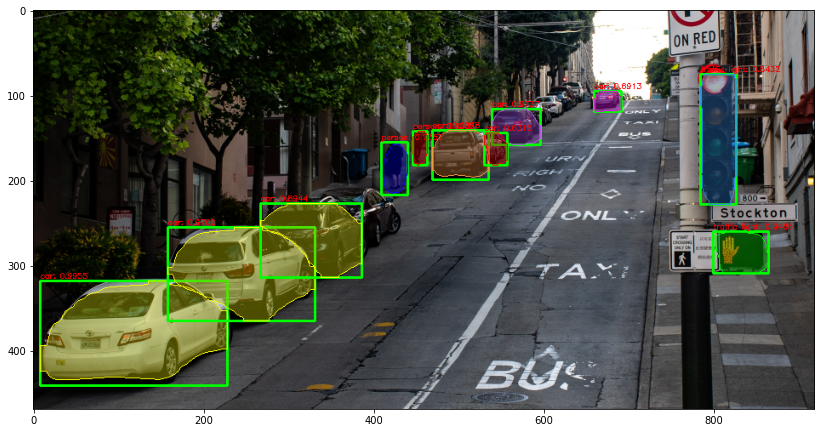

In [ ]:
import numpy as np

numClasses = masks.shape[1]
numDetections = bboxes.shape[2]

draw_img = img_array.copy()

img_height = draw_img.shape[0]
img_width = draw_img.shape[1]
conf_threshold = 0.5
mask_threshold = 0.3

green_color=(0, 255, 0)
red_color=(0, 0, 255)

for i in range(numDetections):
    box = bboxes[0, 0, i]
    mask = masks[i]
    score = box[2]
    if score > conf_threshold:
        classId = int(box[1])
        left = int(img_width * box[3])
        top = int(img_height * box[4])
        right = int(img_width * box[5])
        bottom = int(img_height * box[6])

        text = "{}: {:.4f}".format(labels_to_names_seq[classId], score)
        cv2.rectangle(draw_img, (left, top), (right, bottom), green_color, thickness=2 )
        cv2.putText(draw_img, text, (left, top-3), cv2.FONT_HERSHEY_SIMPLEX, 0.3, red_color, 1)

        classMask = mask[classId]
        print('Detect된 classMask shape:', classMask.shape)
        scaled_classMask = cv2.resize(classMask, (right - left + 1, bottom - top + 1))
        print('원본 오브젝트 비율로 scale out된 classMask shape:', scaled_classMask.shape)
        s_mask_b = (scaled_classMask > mask_threshold)
        print('scaled mask shape:', s_mask_b.shape, 'scaled mask pixel count:', s_mask_b.shape[0]*s_mask_b.shape[1],
              'scaled mask true shape:',s_mask_b[s_mask_b==True].shape, 
              'scaled mask False shape:', s_mask_b[s_mask_b==False].shape)

        before_mask_roi = draw_img[top:bottom+1, left:right+1]
        print('before_mask_roi:', before_mask_roi.shape)
        colorIndex = np.random.randint(0, len(colors)-1)
        color = colors[colorIndex]
        after_mask_roi = draw_img[top:bottom+1, left:right+1][s_mask_b]
        draw_img[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8) 
        s_mask_i = s_mask_b.astype(np.uint8)
        contours, hierarchy = cv2.findContours(s_mask_i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(draw_img[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)

plt.figure(figsize=(14, 14))
draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.imshow(draw_img)
plt.show()